In [1]:
#run: pip install openquantumcomputing
from openquantumcomputing.QAOAMaxCut import QAOAMaxCut

In [2]:
from qiskit import *
import numpy as np
import networkx as nx

import matplotlib.pyplot as pl
from mpl_toolkits.axes_grid1 import make_axes_locatable
from qiskit.visualization import *

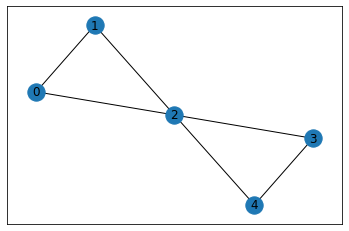

In [3]:
V = np.arange(0,5,1)
E = [(0,1,1.0),(0,2,1.0),(1,2,1.0),(3,2,1.0),(3,4,1.0),(4,2,1.0)] 

G = nx.Graph()
G.add_nodes_from(V)
G.add_weighted_edges_from(E)

pos = nx.spring_layout(G)
nx.draw_networkx(G,pos=pos)
k_cuts=2

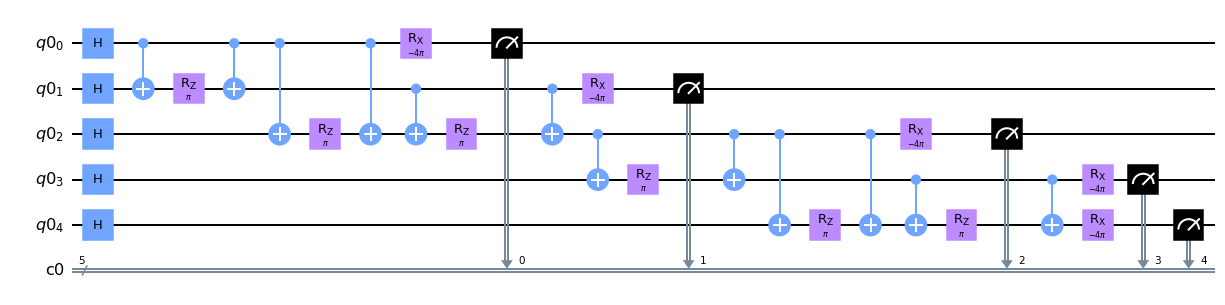

In [4]:
params={'G': G}
qaoamc = QAOAMaxCut()
qaoamc.createCircuit(np.array((np.pi,2*np.pi)),1,params=params).draw(output='mpl')

In [5]:
qasm_sim = Aer.get_backend('qasm_simulator')

In [6]:
qaoamc.sample_cost_landscape(qasm_sim, 1024, params=params, angles={"gamma": [0,np.pi,20], "beta": [0,np.pi/2,10]})

Calculating Energy landscape for depth p=1...
Calculating Energy landscape done


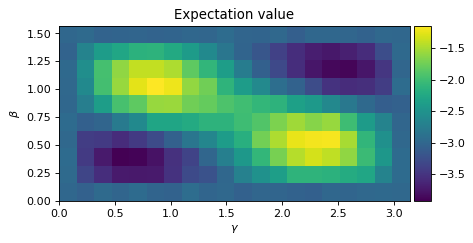

In [7]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Expectation value')
im = ax.imshow(qaoamc.E,interpolation='nearest',origin='lower',extent=[0,np.pi,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

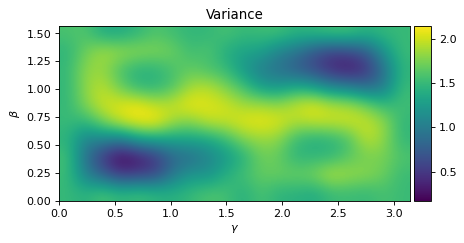

In [8]:
f = pl.figure(figsize=(6, 6), dpi= 80, facecolor='w', edgecolor='k');
_=pl.xlabel(r'$\gamma$')
_=pl.ylabel(r'$\beta$')
ax = pl.gca()
_=pl.title('Variance')
im = ax.imshow(qaoamc.Var,interpolation='bicubic',origin='lower',extent=[0,np.pi,0,np.pi/2])
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
_=pl.colorbar(im, cax=cax)

In [9]:
for i in range(5):
    qaoamc.increase_depth(qasm_sim, 1024, params=params)
display(qaoamc.costval)

Optimization terminated successfully.
         Current function value: -3.951172
         Iterations: 6
         Function evaluations: 15
Optimization terminated successfully.
         Current function value: -3.996094
         Iterations: 35
         Function evaluations: 74
Optimization terminated successfully.
         Current function value: -3.945312
         Iterations: 24
         Function evaluations: 62
Optimization terminated successfully.
         Current function value: -3.980469
         Iterations: 13
         Function evaluations: 44
Optimization terminated successfully.
         Current function value: -3.941406
         Iterations: 7
         Function evaluations: 40


{'d1_final': -3.951171875,
 'd2_final': -3.99609375,
 'd3_final': -3.9453125,
 'd4_final': -3.98046875,
 'd5_final': -3.94140625}

In [10]:
# hist=qaoamc.hist(out.x, qasm_sim,1024, params=params)
# plot_histogram(hist)